# Introduction to Seaborn
### About the Data
In this notebook, we will be working with 2 datasets:
* Facebook's stock price throughout 2018 (obtained using the stock_analysis package)
* Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)

### Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = pd.read_csv('earthquakes-1.csv')

##Categorical data
A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a devastating tsunami afterwards. Let's take a look at some visualizations to understand
what magTypes are used in Indonesia, the range of magnitudes there, and how many of the earthquakes are accompanied by a tsunami.

In [3]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


## stripplot()

The stripplot() function helps us visualize categorical data on one axis and numerical data on the other. We also now have the option of coloring our points using a
column of our data (with the hue parameter). Using a strip plot, we can see points for each earthquake that was measured with a given magType and what its magnitude
was; however, it isn't too easy to see density of the points due to overlap:

<Axes: xlabel='magType', ylabel='mag'>

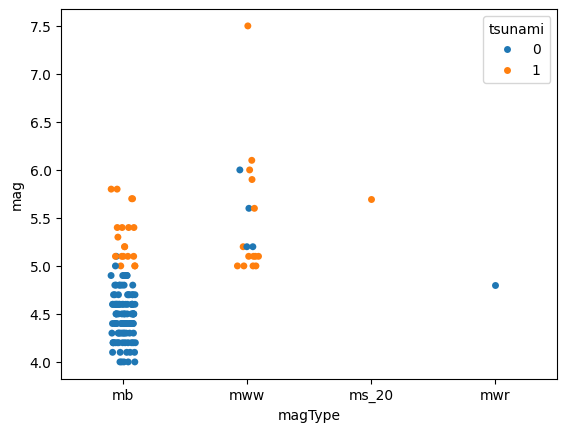

In [4]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)


## swarmplot()
The bee swarm plot helps address this issue be keeping the points from overlapping. Notice how many more points we can see for the blue section of the mb magType :Out[3]:In [4]:
sns.stripplot(
x='magType',
y='mag',
hue='tsunami',
data=quakes.query('parsed_place == "Indonesia"')

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


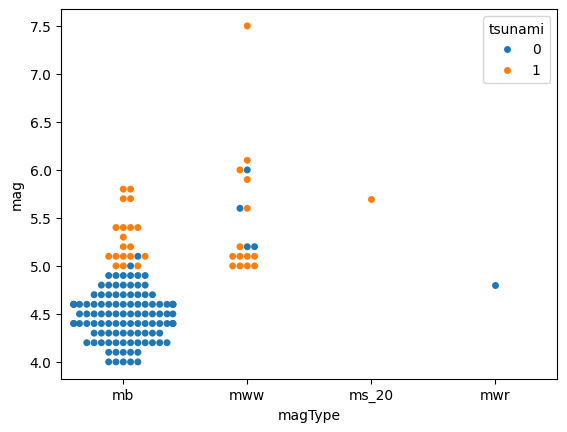

In [5]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)


## Correlations and Heatmaps
### heatmap()

An easier way to create correlation matrix is to use seaborn

<Axes: >

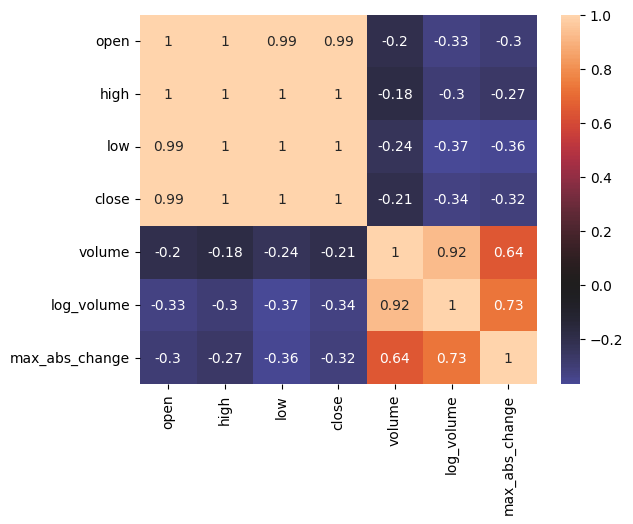

In [6]:
sns.heatmap(
    fb.sort_index().assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr(),
    annot=True, center=0
)

### pairplot()

The pair plot is seaborn's answer to the scatter matrix we saw in the pandas subplotting notebook:

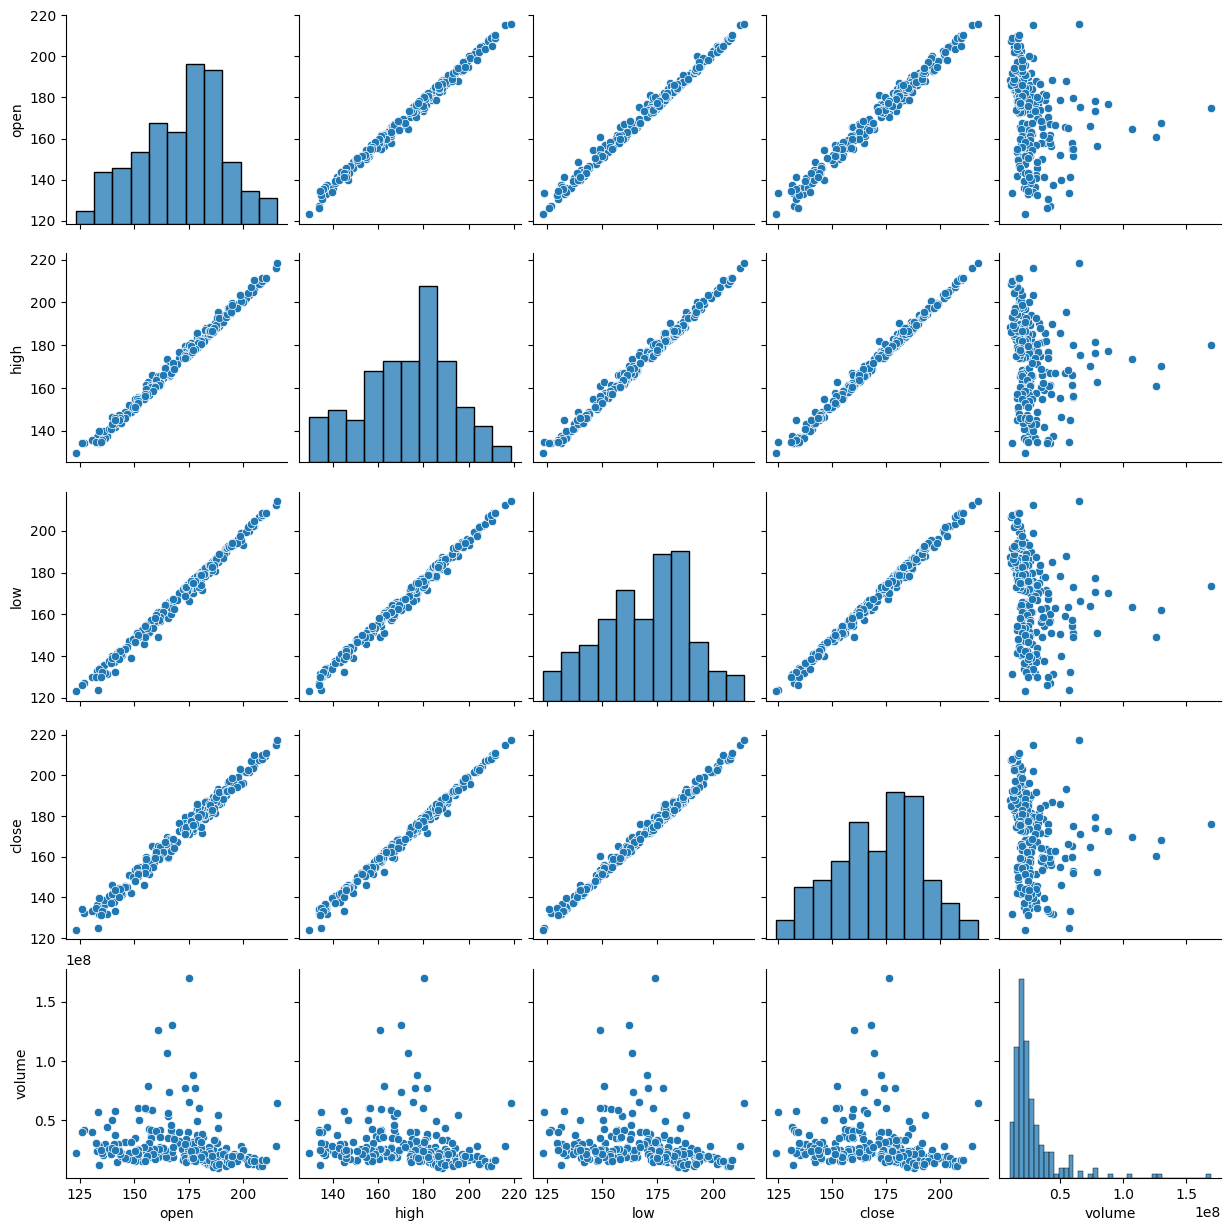

In [7]:
sns.pairplot(fb)

Just as with pandas we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the
same shape):

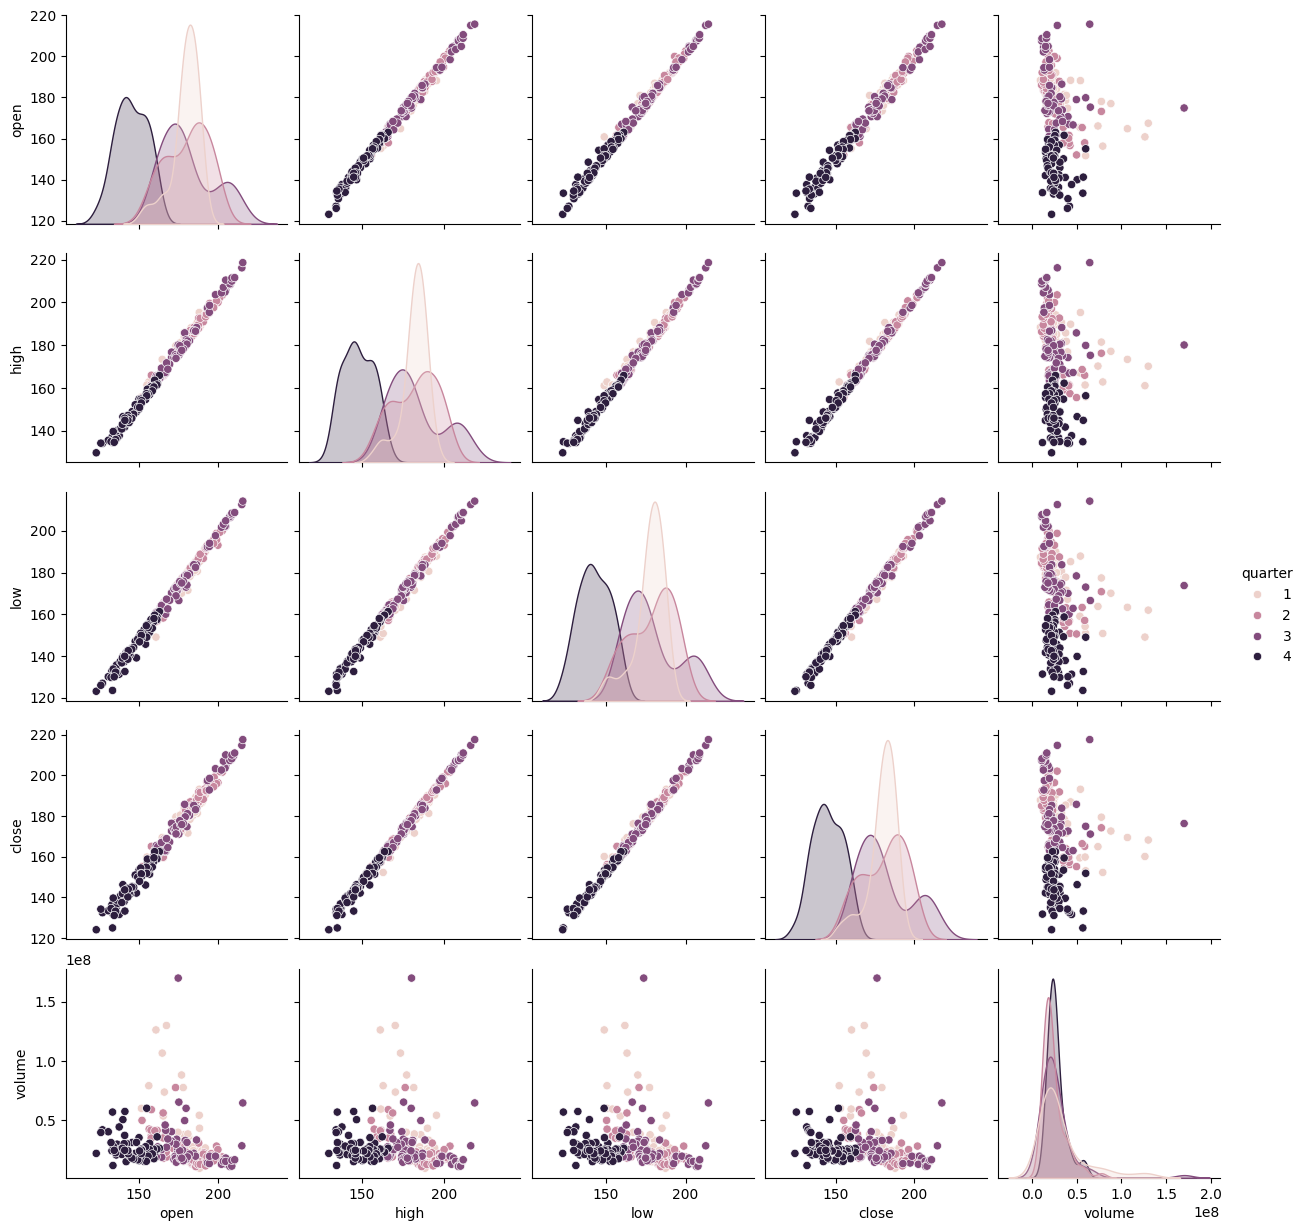

In [8]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

## jointplot()

The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at
the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:

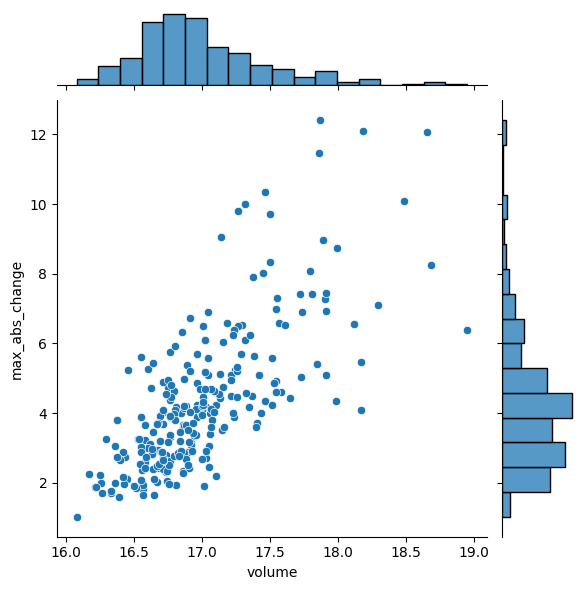

In [9]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

By changing the kind argument, we can change how the center of the plot is displayed. For example, we can pass kind='hex' for hexbins:

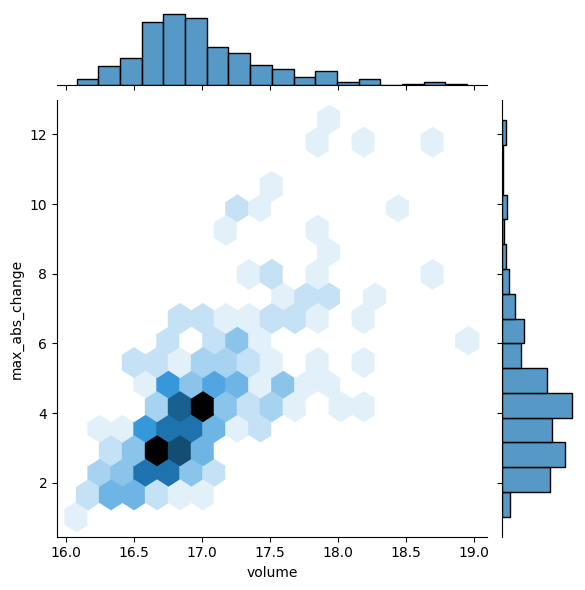

In [10]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

f we specify kind='reg' instead, we get a regression line in the center and KDEs on the sides:

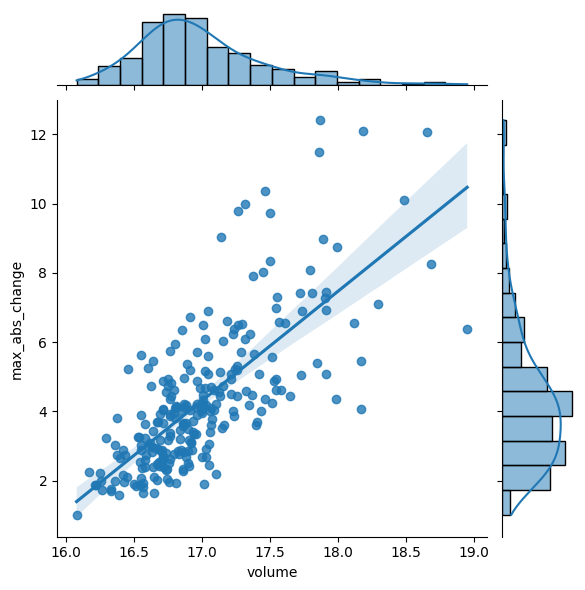

In [11]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)


If we pass kind='resid' , we get the residuals from the aforementioned regression:

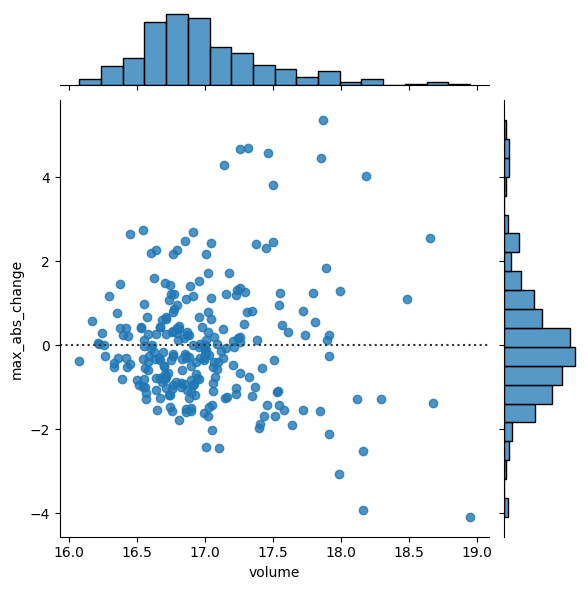

In [12]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Finally, if we pass kind='kde' , we get a contour plot of the joint density estimate with KDEs along the sides:

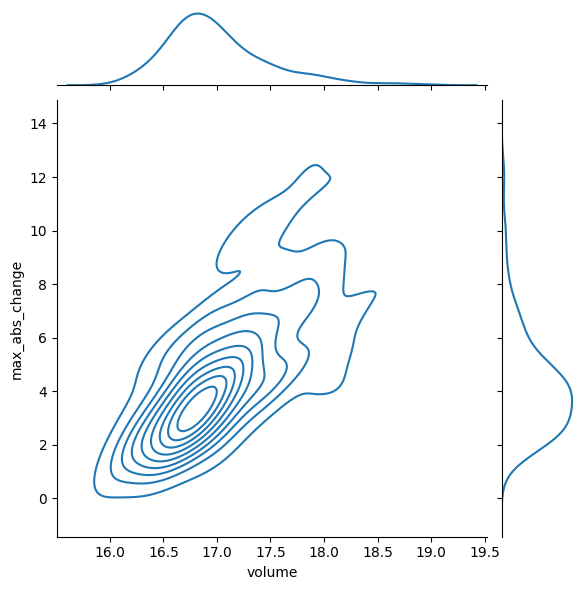

In [13]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

### Regression plots
We are going to use seaborn to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high
stock price - daily low stock price). To do so, we first need to isolate this data:

In [14]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

Since we want to visualize each column as the regressor, we need to look at permutations of their order. Permutations and combinations (among other things) are made easy
in Python with itertools , so let's import it:

In [21]:
import itertools

itertools gives us efficient iterators. Iterators are objects that we loop over, exhausting them. This is an iterator from itertools ; notice how the second loop doesn't
do anything:

In [16]:
iterator = itertools.repeat("I'm an iterator", 1)

for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
     print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


terables are objects that can be iterated over. When entering a loop, an iterator is made from the iterable to handle the iteration. Iterators are iterables, but not all iterables
are iterators. A list is an iterable. If we turn that iterator into an iterable (a list in this case), the second loop runs:

In [17]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


he reg_resid_plots() function from the reg_resid_plot.py module in this folder uses regplot() and residplot() from seaborn along with itertools to
plot the regression and residuals side-by-side

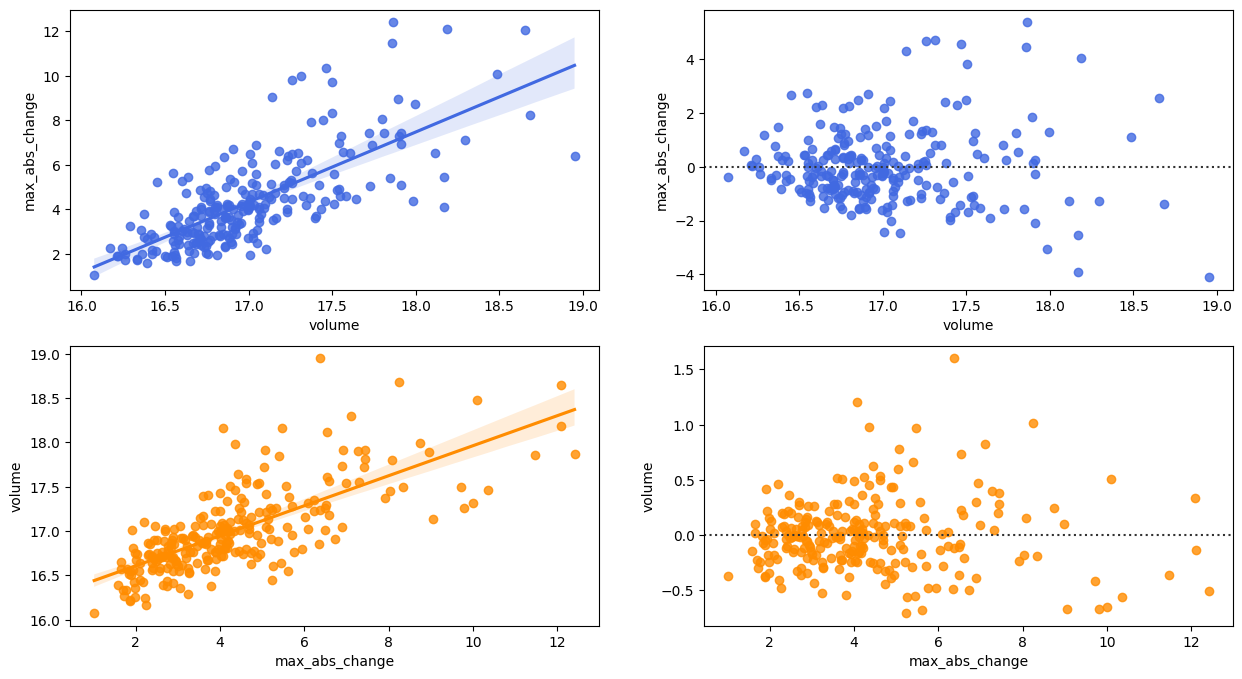

In [24]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

We can use lmplot() to split our regression across subsets of our data. For example, we can perform a regression per quarter on the Facebook stock data:

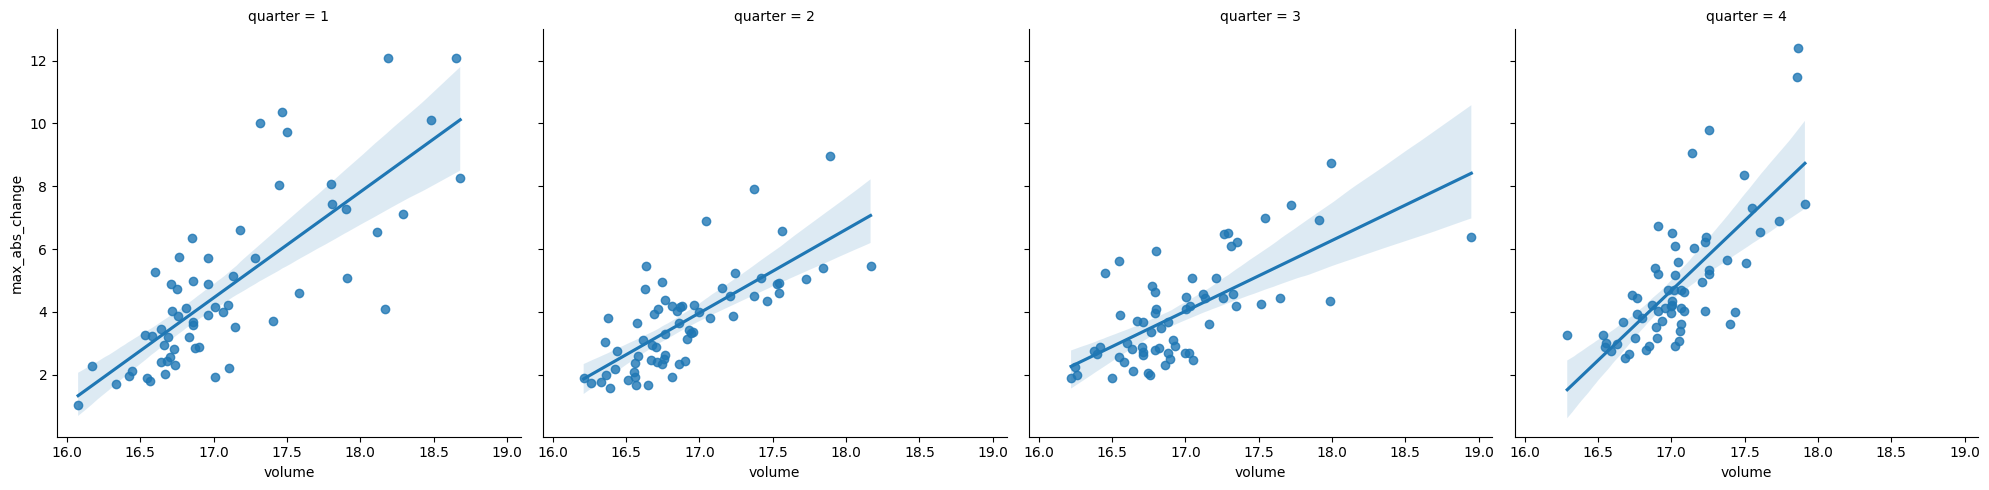

In [25]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

## Distributions

###boxenplot()

Seaborn provides some new plot types for visualizing distributions in additional to its own versions of the plot types we discussed in chapter 5 (in this notebook).

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

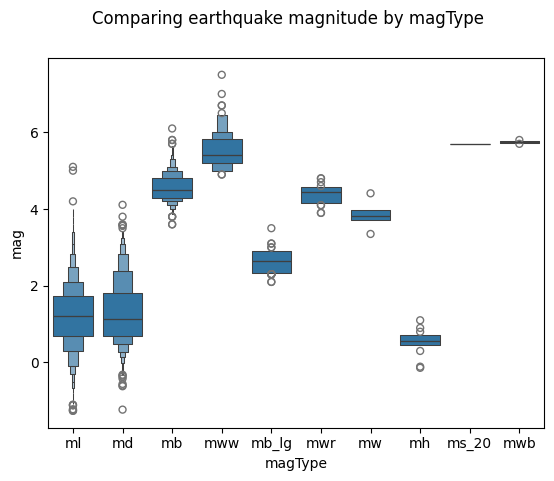

In [26]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

### violinplot()
Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:

<ipython-input-27-dc5ed0aa16e5>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

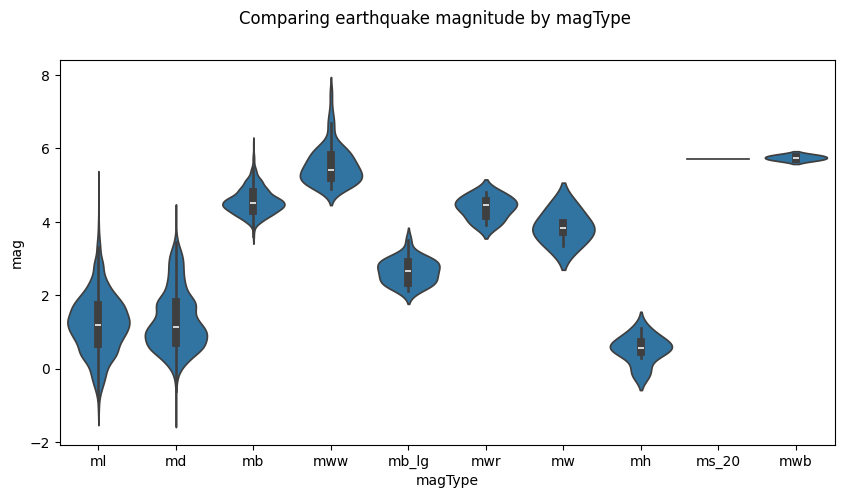

In [27]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],
    ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

### Faceting
We can create subplots across subsets of our data by faceting. First, we create a FacetGrid specifying how to layout the plots (which categorical column goes along the
rows and which one along the columns). Then, we call the map() method of the FacetGrid and pass in the plotting function we want to use (along with any additional
arguments).

Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by magType and parse_placed :

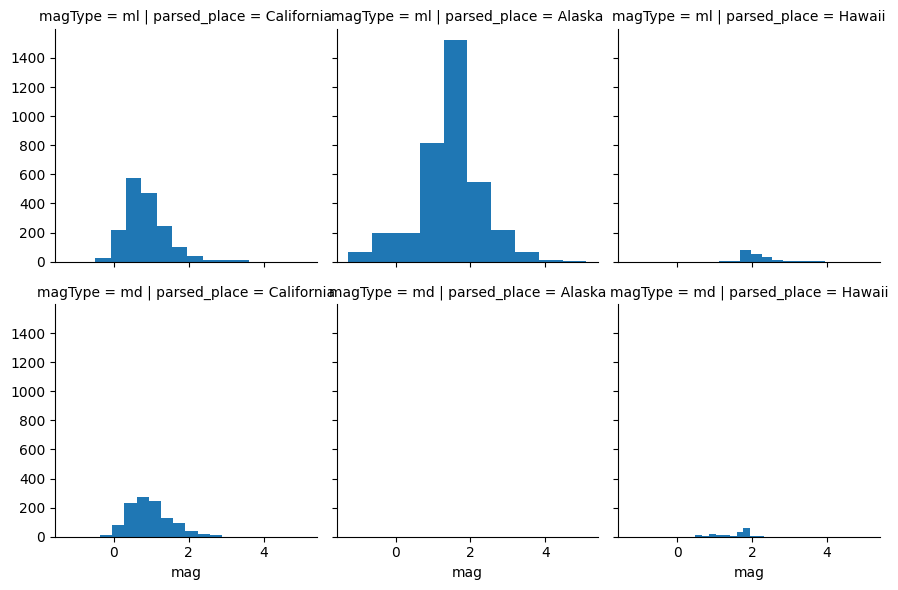

In [28]:
g = sns.FacetGrid(
    quakes[
        (quakes.parsed_place.isin([
            'California', 'Alaska', 'Hawaii'
        ]))\
        & (quakes.magType.isin(['ml', 'md']))
    ],
    row='magType',
    col='parsed_place'
)
g = g.map(plt.hist, 'mag')